## Lending Club Data
 


***

In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.feature_selection import RFE

from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.svm import LinearSVR

import seaborn as sns
import matplotlib.pylab as pl
%matplotlib inline
#import matplotlib.pyplot as plt


### Columns Interested
**loan_status** -- Current status of the loan<br/>

loan_amnt -- The listed amount of the loan applied for by the borrower. If at some point in time, the credit        department reduces the loan amount, then it will be reflected in this value.<br/>
int_rate -- interest rate of the loan <br/>
grade -- LC assigned loan grade<br/>
sub_grade -- LC assigned sub loan grade <br/>

purpose -- A category provided by the borrower for the loan request. <br/> -- **dummy**

annual_inc -- The self-reported annual income provided by the borrower during registration.<br/>
emp_length -- Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. <br/> -- **dummie**

fico_range_low
fico_range_high

home_ownership -- The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER <br/>
tot_cur_bal -- Total current balance of all accounts							
num_actv_bc_tl -- number of active bank accounts<br/>
  (*avg_cur_bal -- average current balance of all accounts *)<br/>

mort_acc -- number of mortgage accounts<br/>

num_actv_rev_tl	-- Number of currently active revolving trades<br/>
dti	-- A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.																								
pub_rec_bankruptcies - Number of public record bankruptcies<br/>

delinq_amnt -- 

-----------
title -- 
mths_since_last_delinq -- The number of months since the borrower's last delinquency.<br/>
mths_since_recent_revol_delinq -- Months since most recent revolving delinquency.<br/>
total_cu_tl -- Number of finance trades<br/>
last_credit_pull_d -- The most recent month LC pulled credit for this loan<br/>

In [76]:
## 2015
df_app_2015 = pd.read_csv('data/LoanStats3d_securev1.csv.zip', compression='zip', low_memory=False,\
                         header=1)

In [77]:
df_app_2015.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period', nan], dtype=object)

In [78]:
df_app_2015.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68615169,NaN,16000.0,16000.0,16000.0,60 months,8.49%,328.19,B,B1,...,0.0,3.0,87.5,50.0,0.0,0.0,307343.0,64371.0,23500.0,59526.0
1,68537564,NaN,8000.0,8000.0,8000.0,36 months,10.78%,261.08,B,B4,...,0.0,4.0,97.1,100.0,0.0,0.0,168819.0,148154.0,5800.0,136996.0
2,68536799,NaN,10000.0,10000.0,10000.0,36 months,10.78%,326.35,B,B4,...,0.0,2.0,100.0,33.3,0.0,0.0,190694.0,40681.0,13900.0,29512.0
3,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99%,820.28,C,C1,...,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
4,68506885,NaN,10000.0,10000.0,10000.0,60 months,11.99%,222.40,C,C1,...,0.0,1.0,100.0,50.0,0.0,0.0,61054.0,41166.0,13100.0,46854.0


In [92]:
df_app_2015['delinq_amnt'].unique()

array([  0.00000000e+00,   6.87000000e+02,   4.00000000e+01,
         3.60000000e+01,   6.00000000e+00,   6.20000000e+01,
         3.30000000e+01,   1.62000000e+02,   1.39400000e+03,
         7.84900000e+03,   8.96000000e+02,   3.76000000e+02,
         1.49200000e+03,   1.40000000e+01,   1.00000000e+00,
         3.03000000e+02,   1.96100000e+03,   6.02000000e+02,
         2.73000000e+03,   3.86650000e+04,   2.59000000e+02,
         1.65000000e+02,   3.39000000e+02,   2.49460000e+04,
         2.89000000e+02,   3.42000000e+02,   2.48000000e+02,
         3.50000000e+01,   5.30000000e+01,   6.50000000e+04,
         1.56000000e+02,   3.00000000e+01,   3.30000000e+02,
         3.43000000e+02,   1.35330000e+04,   7.87000000e+02,
         4.59000000e+03,   1.84000000e+02,   2.00000000e+00,
         1.80000000e+01,   3.34300000e+03,   9.41000000e+02,
         1.33400000e+03,   9.40000000e+01,   1.04300000e+03,
         1.89200000e+03,   4.90000000e+02,   1.26000000e+02,
         2.07080000e+04,

In [32]:
df_app_2015.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 111 columns):
id                                2 non-null object
member_id                         0 non-null float64
loan_amnt                         421095 non-null float64
funded_amnt                       421095 non-null float64
funded_amnt_inv                   421095 non-null float64
term                              421095 non-null object
int_rate                          421095 non-null object
installment                       421095 non-null float64
grade                             421095 non-null object
sub_grade                         421095 non-null object
emp_title                         397221 non-null object
emp_length                        421095 non-null object
home_ownership                    421095 non-null object
annual_inc                        421095 non-null float64
verification_status               421095 non-null object
issue_d                           421

In [38]:
df_app_2015.groupby('title').loan_amnt.mean()

title
Business                                   15607.365207
Car financing                              10082.201439
Credit Card/Auto Repair                    10950.000000
Credit card refinancing                    15953.246747
Debt consolidation                         15755.709990
DebtC                                      20000.000000
Green loan                                  9670.964126
Home buying                                14547.170139
Home improvement                           14748.540413
Learning and training                       2200.000000
Major purchase                             13055.713613
Medical expenses                            9200.547631
Moving and relocation                       8315.978530
New Baby and New House (CC Consolidate)     8000.000000
Other                                      10340.992752
Pay off Lowes Card                         10000.000000
Paying off higher interest cards & auto    21000.000000
Prescription Drug and Medical Costs       

In [39]:
df_app_2015.groupby('purpose').loan_amnt.mean()

purpose
car                   10066.423832
credit_card           15951.617741
debt_consolidation    15756.119210
educational            2200.000000
home_improvement      14751.434191
house                 14542.715577
major_purchase        13058.913948
medical                9215.217115
moving                 8314.121901
other                 10345.197615
renewable_energy       9824.441964
small_business        15642.798751
vacation               6524.455313
wedding                8825.000000
Name: loan_amnt, dtype: float64

In [7]:
df_app_2015['emp_length'].unique()

array(['5 years', '< 1 year', '3 years', '10+ years', '2 years', 'n/a',
       '4 years', '8 years', '6 years', '9 years', '1 year', '7 years', nan], dtype=object)

## Decriptive Analyss

1. Annual income distribution
2. Total loan amount groupby interest rate chunks
3. Average loan amount groupby grade
4. Average loan amount groupby 

In [82]:
## selected columns
df = df_app_2015.ix[:, ['loan_status','loan_amnt', 'int_rate', 'grade', 'sub_grade',\
                        'purpose',\
                        'annual_inc', 'emp_length', 'home_ownership',\
                        'fico_range_low','fico_range_high',\
                        'num_actv_bc_tl', 'tot_cur_bal', 'mort_acc','num_actv_rev_tl',\
                        'pub_rec_bankruptcies','dti' ]]
                    

In [83]:
df.head(3)

,loan_status,loan_amnt,int_rate,grade,sub_grade,purpose,annual_inc,emp_length,home_ownership,fico_range_low,fico_range_high,num_actv_bc_tl,tot_cur_bal,mort_acc,num_actv_rev_tl,pub_rec_bankruptcies,dti
0,Current,16000.0,8.49%,B,B1,credit_card,62000.0,5 years,MORTGAGE,720.0,724.0,4.0,227708.0,3.0,5.0,0.0,28.92
1,Current,8000.0,10.78%,B,B4,debt_consolidation,45000.0,< 1 year,MORTGAGE,670.0,674.0,3.0,148154.0,2.0,11.0,0.0,21.23
2,Current,10000.0,10.78%,B,B4,debt_consolidation,41600.0,3 years,MORTGAGE,695.0,699.0,2.0,168304.0,2.0,5.0,0.0,15.78


In [91]:
len(df.dropna())

421095

In [85]:
df.shape

(421097, 17)

In [86]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period', nan], dtype=object)

In [87]:
len(df[df['loan_status']=='Fully Paid'])

94968

In [88]:
len(df[df['loan_status']=='Default'])

260

In [89]:
len(df[df['loan_status']=='Charged Off'])

33416

In [90]:
len(df[df['loan_status']=='Late (31-120 days)'])

8626

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 15 columns):
loan_status             421095 non-null object
loan_amnt               421095 non-null float64
int_rate                421095 non-null object
grade                   421095 non-null object
sub_grade               421095 non-null object
purpose                 421095 non-null object
title                   420963 non-null object
annual_inc              421095 non-null float64
emp_length              421095 non-null object
home_ownership          421095 non-null object
num_actv_bc_tl          421095 non-null float64
tot_cur_bal             421095 non-null float64
mort_acc                421095 non-null float64
num_actv_rev_tl         421095 non-null float64
pub_rec_bankruptcies    421095 non-null float64
dtypes: float64(7), object(8)
memory usage: 48.2+ MB


In [29]:
df.loan_status.unique()

array(['Current', 'Fully Paid', 'Default', 'Charged Off',
       'Late (16-30 days)', 'Late (31-120 days)', 'In Grace Period', nan], dtype=object)

In [30]:
## Convert applicable fields to numeric (I only select "Interest Rate" to use for this analysis)
df.ix[:,'int_rate'] = df.ix[:,['int_rate']]\
                        .applymap(lambda e: pd.to_numeric(str(e).rstrip()[:-1], errors='coerce'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421097 entries, 0 to 421096
Data columns (total 18 columns):
loan_status                       421095 non-null object
loan_amnt                         421095 non-null float64
int_rate                          421095 non-null float64
grade                             421095 non-null object
sub_grade                         421095 non-null object
purpose                           421095 non-null object
annual_inc                        421095 non-null float64
emp_length                        421095 non-null object
home_ownership                    421095 non-null object
num_actv_bc_tl                    421095 non-null float64
tot_cur_bal                       421095 non-null float64
mort_acc                          421095 non-null float64
num_actv_rev_tl                   421095 non-null float64
total_cu_tl                       21372 non-null float64
pub_rec_bankruptcies              421095 non-null float64
mths_since_last_delinq    

In [57]:
df = df.rename(columns={"int_rate": "int_rate(%)"})

In [58]:
df.head(3)

,loan_status,loan_amnt,int_rate(%),grade,sub_grade,annual_inc,num_actv_bc_tl,avg_cur_bal,mort_acc
0,Current,16000.0,8.49,B,B1,62000.0,4.0,22771.0,3.0
1,Current,8000.0,10.78,B,B4,45000.0,3.0,5926.0,2.0
2,Current,10000.0,10.78,B,B4,41600.0,2.0,9350.0,2.0


In [7]:
#len(df.dropna(thresh=  , axis=1).columns)

52

In [59]:
df.describe()

,loan_amnt,int_rate(%),annual_inc,num_actv_bc_tl,avg_cur_bal,mort_acc
count,421095.000000,421095.000000,4.210950e+05,421095.000000,421095.000000,421095.000000
mean,15240.285862,12.600374,7.696561e+04,3.740966,13104.784721,1.685261
std,8571.325901,4.318474,7.394996e+04,2.304542,15671.803897,1.990160
min,1000.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000
25%,8500.000000,9.170000,4.600000e+04,2.000000,3199.000000,0.000000
50%,14000.000000,12.290000,6.500000e+04,3.000000,7262.000000,1.000000
75%,20000.000000,15.590000,9.169050e+04,5.000000,17974.500000,3.000000
max,35000.000000,28.990000,9.500000e+06,32.000000,555925.000000,52.000000


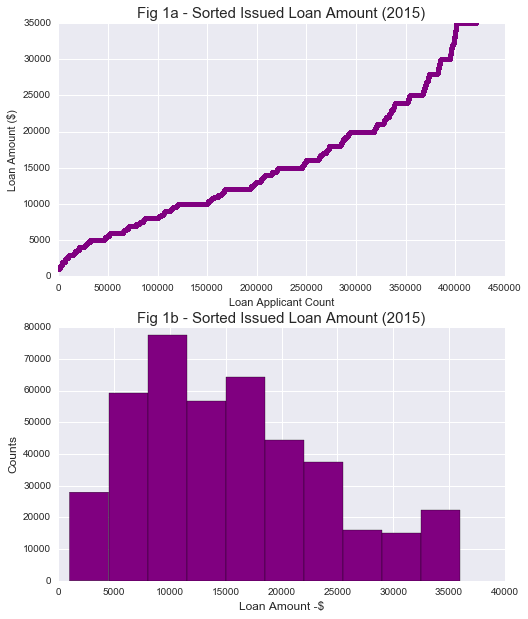

In [168]:
# 1. Loan Amount distribution
# # create plots and histogram to visualize total loan amounts 
fig = pl.figure(figsize=(8,10))
ax1 = fig.add_subplot(211)
ax1.plot(range(len(df)), sorted(df.loan_amnt), '.', color='purple')
ax1.set_xlabel('Loan Applicant Count')
ax1.set_ylabel('Loan Amount ($)')
ax1.set_title('Fig 1a - Sorted Issued Loan Amount (2015)', size=15)

# all_ histogram
# pick upper bound 900 to exclude too large numbers
ax2 = fig.add_subplot(212)
ax2.hist(df.loan_amnt, range=(df.loan_amnt.min(), 36000), color='purple')
ax2.set_xlabel('Loan Amount -$', size=12)
ax2.set_ylabel('Counts',size=12)
ax2.set_title('Fig 1b - Sorted Issued Loan Amount (2015)', size=15)

**Fig 1a** shows the sorted issued loan amounts from low to high.<br/>
**Fig 2c** is a histogram showing the distribution of the issued loan amounts.

**Obeservation**<br/>
The Loan amounts vary from $1000 to $35,000, and the most frequent loan amounts issued are around $10,000.

In [81]:
inc_75 = df.describe().loc['75%', 'annual_inc']
count_75 = int(len(df)*0.75)

315822

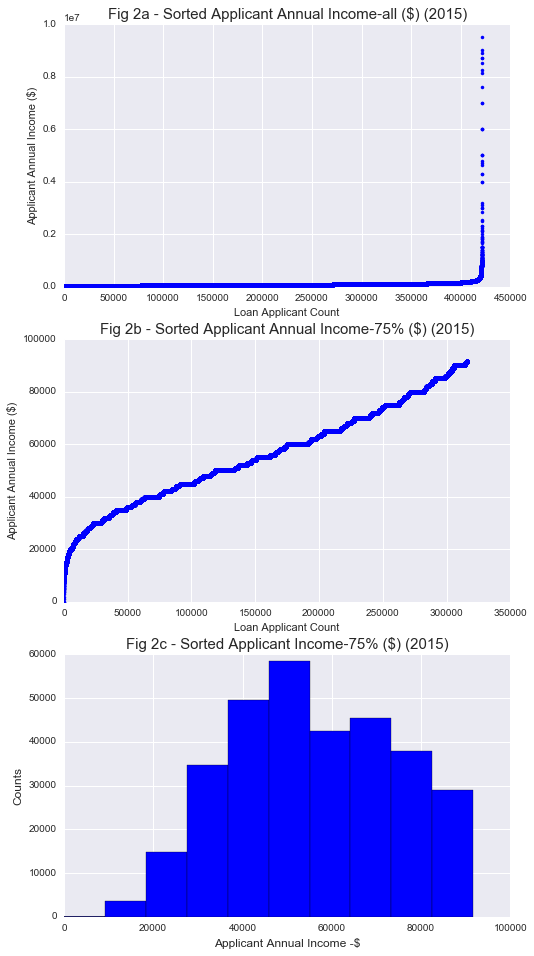

In [165]:
# 2. Applicant Anual Income Distribution

fig = pl.figure(figsize=(8,16))

ax0 = fig.add_subplot(311)
ax0.plot(range(len(df.annual_inc)), sorted(df.annual_inc), '.', color='blue')
ax0.set_xlabel('Loan Applicant Count')
ax0.set_ylabel('Applicant Annual Income ($)')
ax0.set_title('Fig 2a - Sorted Applicant Annual Income-all ($) (2015)', size=15)

# use 75% quantile to plot the graph and histograms -- excluding extreme values
inc_75 = df.describe().loc['75%', 'annual_inc']
inc_below75 = df.annual_inc[df.annual_inc <= inc_75]
count_75 = int(len(df)*0.75)

ax1 = fig.add_subplot(312)
ax1.plot(range(count_75), sorted(df.annual_inc)[:count_75], '.', color='blue')
ax1.set_xlabel('Loan Applicant Count')
ax1.set_ylabel('Applicant Annual Income ($)')
ax1.set_title('Fig 2b - Sorted Applicant Annual Income-75% ($) (2015)',size=15)

# all_ histogram
# pick upper bound 900 to exclude too large numbers
ax2 = fig.add_subplot(313)
ax2.hist(df.annual_inc, range=(df.annual_inc.min(), inc_75), color='blue')
ax2.set_xlabel('Applicant Annual Income -$', size=12)
ax2.set_ylabel('Counts',size=12)
ax2.set_title('Fig 2c - Sorted Applicant Income-75% ($) (2015)',size=15)

**Fig 2a** and **Fig 2b** both show the sorted applicant annual income from low to high. The former indicates extreme values, and the latter plots only those values below the 75% quantile, which looks more sensible.<br/>
**Fig 2c** is a histogram showing the distribution of the applicants' income (below 75% quantile).

**Obeservation**
The most frequent annual income amounts of ths applicants are between $40,000 and below $60,000.

In [69]:
4.600000e+04

46000.0

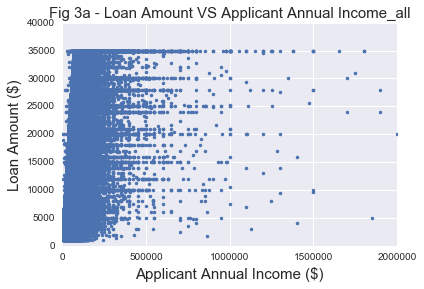

In [94]:
# 3. Loan amount and Applicant Annual Income
# View all
pl.figure(figsize=(6,4))
pl.plot(df.annual_inc, df.loan_amnt, '.')
pl.ylim(0, 40000)
pl.xlim(0, 0.2e7)   # df.annual_inc.max()
pl.title('Fig 3a - Loan Amount VS Applicant Annual Income_all', size=15)
pl.ylabel('Loan Amount ($)', size=15)
pl.xlabel('Applicant Annual Income ($)', size=15)

**Fig 3a** shows the approved loan amount against the applicants' annual income. <br/>

** Oberservation:**<br/>
We can see that there are a few people with self-reported income that is very high, while majority of the applicants are with income less than $100,000. These extreme values indicate a possibility of outliers. 

**Method to deal with Outliers** <br/>
Locate Outliers using Median-Absolute-Deviation (MAD) test and remove them for further analysis

Pick samples to set outlier range using the mean of the outlier boundries-- the method could be improved by using ramdom sampling

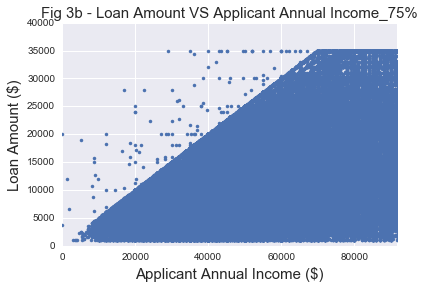

In [102]:
# 3b
pl.figure(figsize=(6,4))
pl.plot(df.annual_inc, df.loan_amnt, '.')
pl.ylim(0, 40000)
pl.xlim(0, inc_75)
pl.title('Fig 3b - Loan Amount VS Applicant Annual Income_75%', size=15)
pl.ylabel('Loan Amount ($)', size=15)
pl.xlabel('Applicant Annual Income ($)', size=15)

**Fig 3b** is plot of the loan amount VS applicant annual income with all extreme income amounts being excluded. 

**Observation:**<br/>
Now it is clearer to see that there is quite "rigid" standard to determine loan amounts based on income, however, there are still exceptions (sparse points above the "division line".

/Users/fatkay22/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


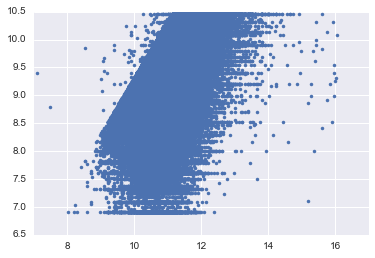

In [91]:
pl.plot(np.log(df.annual_inc), np.log(df.loan_amnt), '.')

In [116]:
# 4. Average loan amount groupby grade
mean_loan_grade = df.groupby('grade')['loan_amnt'].mean()
mean_loan_grade

grade
A    14691.902340
B    14251.806455
C    14745.592285
D    15947.183739
E    18472.726622
F    20090.274524
G    20427.838025
Name: loan_amnt, dtype: float64

In [117]:
sum_loan_grade = df.groupby('grade')['loan_amnt'].sum()
sum_loan_grade

grade
A    1.077445e+09
B    1.676098e+09
C    1.777832e+09
D    9.991548e+08
E    6.455848e+08
F    1.972262e+08
G    4.426712e+07
Name: loan_amnt, dtype: float64

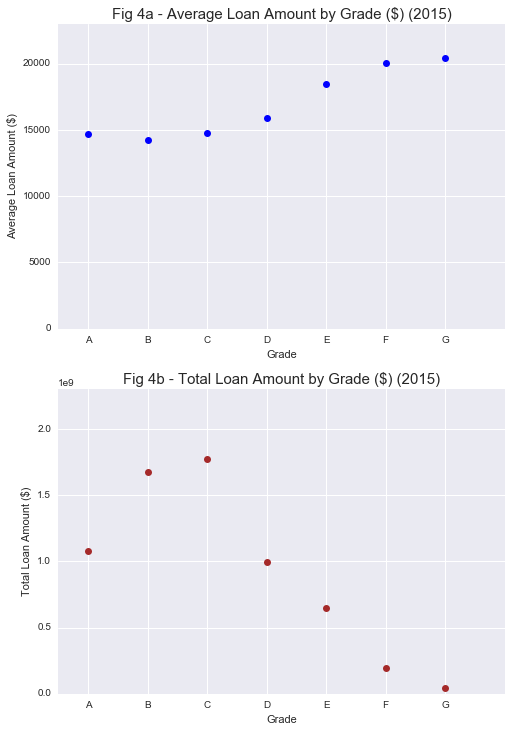

In [169]:
fig = pl.figure(figsize=(8,12))  #16,5

ax0 = fig.add_subplot(211)
ax0.plot(range(len(mean_loan_grade)), mean_loan_grade, 'o', color='blue')

ax0.set_ylim(0, 23000)
ax0.set_xlim(-0.5, len(mean_loan_grade))

ax0.set_xticks(range(len(mean_loan_grade)))
ax0.set_xticklabels(('A','B','C','D','E','F','G'))
ax0.set_xlabel('Grade')
ax0.set_ylabel('Average Loan Amount ($)')
ax0.set_title('Fig 4a - Average Loan Amount by Grade ($) (2015)', size=15)


ax1 = fig.add_subplot(212)
ax1.plot(range(len(sum_loan_grade)), sum_loan_grade, 'o', color='brown')

ax1.set_ylim(0, 2.3e9)
ax1.set_xlim(-0.5, len(sum_loan_grade))

ax1.set_xticks(range(len(sum_loan_grade)))
ax1.set_xticklabels(('A','B','C','D','E','F','G'))
ax1.set_xlabel('Grade')
ax1.set_ylabel('Total Loan Amount ($)')
ax1.set_title('Fig 4b - Total Loan Amount by Grade ($) (2015)', size=15)


**Fig 4a** shows the avereage approved loan amounts corresponded to the grades determined by the Lending Club. <br/>
**Fig 4b** shows the total approved loan amounts corresponded to the grades determined by the Lending Club. <br/>

** Oberservation:**<br/>
It is interesting to see that the points in these two charts have different trends-- the total loan amount gets higher from grade A to C, and then fall to a very low level; the average loan amount falls a little from grade A to grade B, and then gradually increases as the grade goes from B to G (increased by more than $5,000 from B to G).